In [7]:
# Plot the hourly STA-LTA detection numbers for the observation period

In [8]:
## Importing modules
from os.path import join, dirname   
from matplotlib.pyplot import subplots
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from pandas import read_csv, to_datetime, DataFrame

In [9]:
## Inputs
datapath = "/Volumes/OmanData/geophones_no_prefilt/data/sta_lta_detections.csv"
stations_inner = ["A01", "A02", "A03", "A04", "A05", "A06", "B01", "B02", "B03", "B04", "B05", "B06"]

ymax = 3800

In [10]:
## Read the data
df = read_csv(datapath, delimiter=" ", parse_dates=True, na_values=["nan"])
df.columns = ["datetime"] + list(df.columns[1:])
df["datetime"] = to_datetime(df["datetime"], format="%Y-%m-%d-%H-%M-%S")


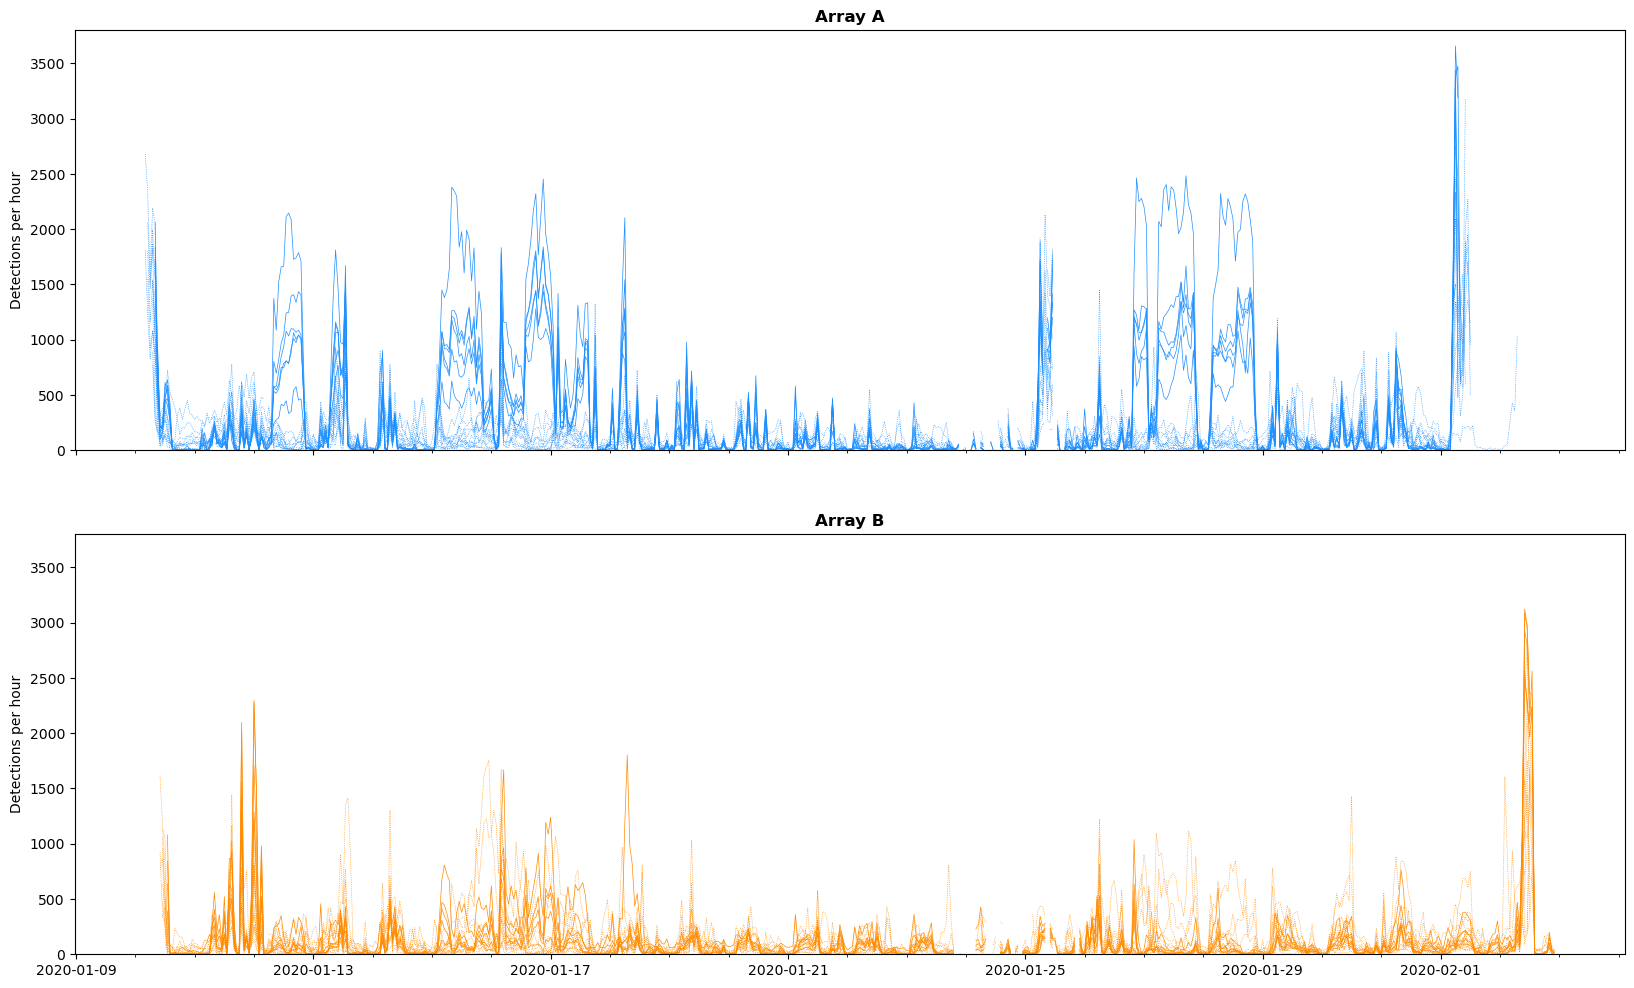

In [11]:

fig, axes = subplots(2, 1, sharex=True, figsize=(20, 12))

timeax = df["datetime"].values

df_sta = df.iloc[:, 1:]
for station, data in df_sta.items():
    if station.startswith("A"):
        if station in stations_inner:
            axes[0].plot(timeax, data, color="dodgerblue", label=station, linewidth=0.5)
        else:
            axes[0].plot(timeax, data, color="dodgerblue", label=station, linestyle=":", linewidth=0.5) 
    else:
        if station in stations_inner:
            axes[1].plot(timeax, data, color="darkorange", label=station, linewidth=0.5)
        else:
            axes[1].plot(timeax, data, color="darkorange", label=station, linestyle=":", linewidth=0.5)

axes[0].set_ylim(0, ymax)
axes[1].set_ylim(0, ymax)

axes[0].set_ylabel("Detections per hour")
axes[1].set_ylabel("Detections per hour")

axes[0].set_title("Array A", fontweight="bold")
axes[1].set_title("Array B", fontweight="bold")

# Set the major tick spacing of the x axes to one day
axes[0].xaxis.set_minor_locator(DayLocator())
axes[1].xaxis.set_minor_locator(DayLocator())


In [12]:
import os
## Save the figure
fig.tight_layout()

outdir = dirname(datapath)
outpath = join(outdir, "sta_lta_detections_by_time.png")
fig.savefig(outpath, dpi=300, transparent=True)